# <center>Metody Numeryczne – Projekt 2</center>

### <center>Układy równań liniowych - sprawozdanie</center>
### <center>Agnieszka Delmaczyńska 184592</center>
<center>Informatyka, semestr 4, grupa 1</center>

### 1. Opis realizowanego zagadnienia

#### 1. Wstęp

W ramach pierwszego projektu należało zaimplementować metody iteracyjne Jacobiego i Gaussa-Seidla oraz metodę bezpośrednią faktoryzacji LU do rozwiązywania układów równań liniowych, które powstają w wyniku dyskretyzacji równań różniczkowych i są powszechnie stosowane w różnych zagadnieniach techniczno-informatycznych.

#### 2. Konstrukcja układu równań

Układ równań ma następującą postać:
<b>Ax = b</b>
gdzie <b>A</b> jest macierzą systemową, <b>b</b> jest wektorem pobudzenia, natomiast <b>x</b> jest wektorem rozwiązań reprezentującym szukaną wielkość fizyczną. U projekcie będę działała na tych wartościach w funkcjach pomocniczych i tworzących, a w funkcji main dla czytelności nazwę je odpowiednio `matrix_A`, `vector_b` i `vector_of_solutions_x`.

* Na potrzeby testów przyjmuję, że <b>A</b> jest tzw. macierzą pasmową o rozmiarze
N × N , gdzie N ma wartość 9cd, c jest przedostatnią cyfrą numeru mojego
indeksu, natomiast d ostatnią (184592)

`c: 9`
`d: 2`
`N:992`

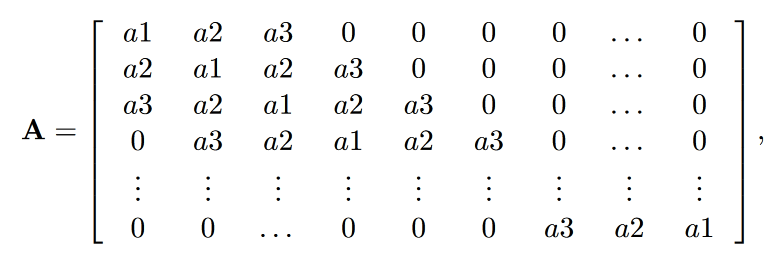

Macierz A zawiera więc pięć diagonali - główna z elementami a1, dwie sąsiednie z
elementami a2 i dwie skrajne diagonale z elemetnami a3.
* Prawa strona równania to wektor b o długości N .
* W wyniku rozwiązania układu równań otrzymujemy wektor x

#### 3. Wektor residuum

Jest to wektor, który określa, w której iteracji algorytm powinien si,ę zatrzymać. Ma on postać: <b>res^(k) = Ax^(k) - b</b>

Za pomocą jego normy euklidesowej możemy obliczyć jaki błąd wynosi wektor x. Jeśli algorytm zbiegnie się do dokładnego rozwiązania, residuum powinno być wektorem zerowy. Używam w projekcie kryterium stopu: 10^(-9).

### 2. Implementacja

W projekcie używam kilku dodatkowych bibliotek: `time` do wyznaczania czasu, `math` do obliczeń matematycznych, `matplotlib` do wyświetlania wykresów i `sys, os`.

In [14]:
import time
import math
from matplotlib import pyplot
import sys, os

### <u>Zadanie A</u>

Stworzyłam macierz <b>A</b>, która wygląda następująco:
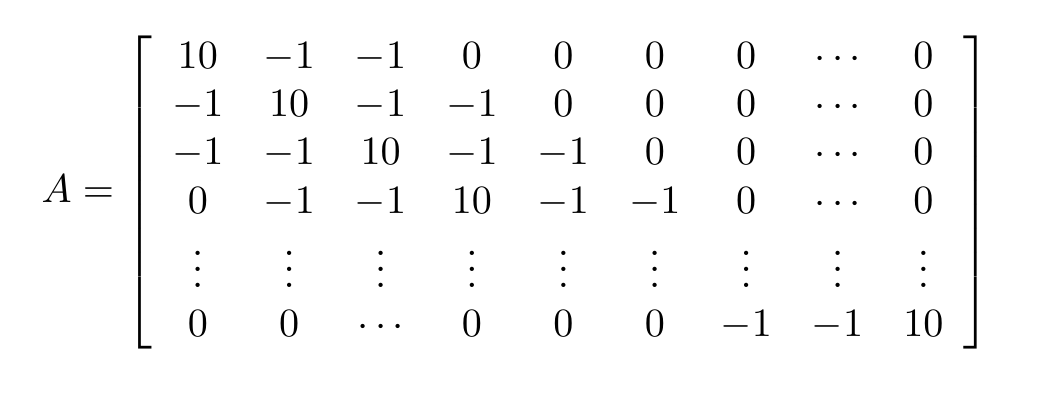

Poniżej funkcje, z których będę korzystać pomocniczo do wykonywania operacji na macierzach i wektorach oraz pozostałe do tworzenia macierzy i wektora i nie tylko.

In [15]:
# stwórz macierz A
def create_matrix_A(N, a1) -> list:
    a2 = a3 = -1
    matrix_A = []
    for i in range(N):
        row = []
        for j in range(N):
            if j == i:
                row.append(a1)
            elif (j == i - 1 and j >= 0) or (j == i + 1 and j <= N):
                row.append(a2)
            elif (j == i - 2 and j >= 0) or (j == i + 2 and j <= N):
                row.append(a3)
            else:
                row.append(0)
        matrix_A.append(row)
    return matrix_A


# funkcja do tworzenia wektora
def create_vector_b(N) -> list:
    f = 4
    b = [math.sin(n * (f + 1)) for n in range(N)]
    return b

# funkcja do wymnożenia macierzy przez wektor
def dot_product(A, b) -> list:
    copy_a = copy_matrix(A)
    copy_b = copy_vector(b)
    temp = [0 for _ in range(len(copy_a))]
    for i in range(len(copy_a)):
        for l in range(len(copy_a[0])):
            temp[i] += copy_a[i][l] * copy_b[l]
    return temp

# funkcja do odejmowania od siebie wektorów
def sub_vectors(a, b) -> list:
    temp = copy_vector(a)
    for i in range(len(temp)):
        temp[i] -= b[i]
    return temp

# funkcja do kopiowania wektora
def copy_vector(_vector):
    copy = []
    for element in _vector:
        copy.append(element)
    return copy

# funkcja do kopiowania macierzy
def copy_matrix(_matrix):
    copy = []
    for row in _matrix:
        create_new_row = []
        for element in row:
            create_new_row.append(element)
        copy.append(create_new_row)
    return copy

# funkcja do wyliczenia normy z residuum
def norm_residuum(vector) -> float:
    count = 0
    for element in vector:
        count += element ** 2
    return math.sqrt(count)

# wygeneruj wektor zer
def vec_zeros(length):
    vector = []
    for _ in range(length):
        vector.append(0)
    return vector

# wygeneruj macierz zer
def matrix_zeros(x_position, y_position):
    matrix = []
    for _ in range(y_position):
        row = []
        for _ in range(x_position):
            row.append(int(0))
        matrix.append(row)
    return matrix

def stdout_block_print():
    sys.stdout = open(os.devnull, 'w')

def stdout_enable_print():
    sys.stdout = sys.__stdout__

### <u>Zadanie B</u>

Zaimplementowane metody Jacobiego i Gaussa-Seidl'a. Poniżej w wywołaniu sprawdzenie ile iteracji potrzebuje każda z nich,
dla układu równań z podpunktu A, żeby otrzymać normę z wektora residuum równą 10−9. Poniżej porównany czas trwania algorytmów.

In [16]:
def jacobi_method(A, b)  -> float:
    # startujemy czas do wykonania pomiaru
    __time_start = time.time()
    # ustawiamy początkowy licznik iteracji na 0
    __iterations = 0
    # tworzymy wektor tymczasowych rozwiązań, który jest długości rozmiaru macierzy A i wypełniony jest zerami
    __temporary_vector_of_solutions_x = vec_zeros(len(b))
    # tworzymy wektor rozwiązań, do którego wpisujemy stworzony uprzednio wektor zer o dł. A
    __vector_of_solutions_x = vec_zeros(len(b))

    # wykonuj algorytm dopóki warunki są spełnione
    try:
        while True:
            for i in range(len(A)):
                # wyciągamy wartość 'i' z wektora b z takiego samego indeksu co macierz A
                __get_value = b[i]
                for j in range(len(A)):
                    # sprawdzamy, czy wartości i oraz j są różne
                    if i != j:
                        # jeśli ten warunek jest spełniony, to aktualizujemy naszą wartość poprzez
                        # odjęcie iloczynu elementu macierzy A z elementem wektora rozwiązań x
                        __get_value -= A[i][j] * __vector_of_solutions_x[j]
                # aktualizujemy __get_value
                __get_value /= A[i][i]
                # aktualizujemy temporary_vector_of_solutions_x[i] o nową wartość, która w tym
                # wektorze początkowo miała wartość 0
                __temporary_vector_of_solutions_x[i] = __get_value
            # ostatecznie po wykonaniu się zewnętrznej pętli kopiujemy zawartość tymczasowego wektora
            # do wykonywania operacji do ostatecznego wektora rozwiązań __vector_of_solutions_x
            __vector_of_solutions_x = copy_vector(__temporary_vector_of_solutions_x)
            # liczymy residuum:     residuum (iterations) = Ax(iterations) − b
            __vector_residuum = sub_vectors(dot_product(A, __vector_of_solutions_x), b)

            # kryterium stopu to norma z residuum o wartości mniejszej niż 10−9
            if norm_residuum(__vector_residuum) < pow(10, -9):
                break
            # aktualizacja liczby iteracji potrzebnych do wykonania się algorytmu i osiągnięcia wyznaczonej normy z residuum
            __iterations += 1
    except:
        print('Błąd')

    print("___________________________________________")
    print("|     Metoda Jacobiego")
    print("|     ****************")
    print("|     1) Czas wykonania: ", time.time() - __time_start)
    print("|     2) Liczba potrzebnych iteracji: ", __iterations)
    print("-------------------------------------------")
    print()
    # zwróć czas wykonania algorytmu
    return time.time()-__time_start


def gauss_seidel_method(A, b) -> float:
    # startujemy czas do wykonania pomiaru
    __time_start = time.time()
    # ustawiamy początkowy licznik iteracji na 0
    __iterations = 0
    # tworzymy wektor rozwiązań, wypełniony początkowo zerami
    __vector_of_solutions_x = vec_zeros(len(b))

    try:
        # wykonuj algorytm dopóki warunki są spełnione
        while True:
            for i in range(len(A)):
                # wyciągamy wartość 'i' z wektora b z takiego samego indeksu co macierz A
                __get_value = b[i]
                for j in range(len(A)):
                    # sprawdzamy, czy wartości i oraz j są różne
                    if i != j:
                        # jeśli ten warunek jest spełniony, to aktualizujemy naszą wartość poprzez
                        # odjęcie iloczynu elementu macierzy A z elementem wektora rozwiązań x
                        __get_value -= A[i][j] * __vector_of_solutions_x[j]
                # aktualizujemy __get_value
                __get_value /= A[i][i]
                # w miejsce i-tego elementu wektora wstawiamy obliczaną wartość __get_value
                __vector_of_solutions_x[i] = __get_value
            # liczymy residuum:     residuum (iterations) = Ax(iterations) − b
            __vector_residuum = sub_vectors(dot_product(A, __vector_of_solutions_x), b)
            # kryterium stopu to norma z residuum o wartości mniejszej niż 10−9
            if norm_residuum(__vector_residuum) < pow(10, -9):
                break
            # aktualizacja liczby iteracji potrzebnych do wykonania się algorytmu i osiągnięcia wyznaczonej normy z residuum
            __iterations += 1
    except:
        print('Błąd')


    print("___________________________________________")
    print("|     Metoda Gaussa-Seidl'a")
    print("|     ****************")
    print("|     1) Czas wykonania: ", time.time() - __time_start)
    print("|     2) Liczba potrzebnych iteracji: ", __iterations)
    print("-------------------------------------------")
    print()
    # zwróć czas wykonania algorytmu
    return time.time()-__time_start

Zaimplementowane metofy do faktoryzacji LU:

In [17]:
def create_LU(A) -> (list, list):
    # tworzymy macierz trójkątną dolną
    N = len(A)
    matrix_L = [[1 if x == y else 0 for x in range(N)] for y in range(N)]
    # tworzymy macierz trójkątną górną
    matrix_U = matrix_zeros(len(A), len(A))

    for i in range(N):

        for j in range(i + 1):
            matrix_U[j][i] += A[j][i]
            for iters in range(j):
                matrix_U[j][i] -= matrix_L[j][iters] * matrix_U[iters][i]

        for j in range(i + 1, N):
            for iters in range(i):
                matrix_L[j][i] -= matrix_L[j][iters] * matrix_U[iters][i]
            matrix_L[j][i] += A[j][i]
            matrix_L[j][i] /= matrix_U[i][i]
    return matrix_L, matrix_U


def LU_method(A, b) -> float:
    # startujemy czas do wykonania pomiaru
    __time_start = time.time()
    N = len(A)
    # tworzymy wektor rozwiązań, wypełniony początkowo jedynkami
    vector_of_solutions_x = [1 for _ in range(N)]
    # tworzymy wektor rozwiązań, wypełniony początkowo zerami
    vector_y = [0 for _ in range(N)]
    # tworzymy macierze matrix_L, matrix_U
    matrix_L, matrix_U = create_LU(A)

    # Ly = b
    for i in range(N):
        temporary = b[i]
        for j in range(i):
            temporary -= matrix_L[i][j] * vector_y[j]
        vector_y[i] = temporary / matrix_L[i][i]

    # Ux = y
    for i in range(N - 1, -1, -1):
        temporary = vector_y[i]
        for j in range(i + 1, N):
            temporary -= matrix_U[i][j] * vector_of_solutions_x[j]
        vector_of_solutions_x[i] = temporary / matrix_U[i][i]
    # liczymy residuum:     residuum (iterations) = Ax(iterations) − b
    vector_residuum = sub_vectors(dot_product(A, vector_of_solutions_x), b)

    print("___________________________________________")
    print("|     Metoda LU")
    print("|     ****************")
    print("|     1) Czas wykonania: ", time.time() - __time_start)
    print("|     2) Norma z residuum:", norm_residuum(vector_residuum))
    print("-------------------------------------------")
    # zwróć czas wykonania algorytmu
    return time.time()-__time_start

In [12]:
if __name__ == "__main__":
    # Zadanie B
    N = 992
    a1 = 10
    matrix_A = create_matrix_A(N, a1)
    vector_b = create_vector_b(N)
    time_jac = jacobi_method(matrix_A, vector_b)
    time_gauss = gauss_seidel_method(matrix_A, vector_b)

___________________________________________
|     Metoda Jacobiego
|     ****************
|     1) Czas wykonania:  7
|     2) Liczba potrzebnych iteracji:  18
-------------------------------------------

___________________________________________
|     Metoda Gaussa-Seidl'a
|     ****************
|     1) Czas wykonania:  5
|     2) Liczba potrzebnych iteracji:  13
-------------------------------------------



Metoda Jacobiego potrzebuje więcej iteracji i jest odrobinę wolniejsza.

### <u>Zadanie C</u>

Tworzę układ równań netodami Jacobiego i Gaussa-Seidel'a dla `a1 = 3`, `a2 = a3 = −1` i `N = 9cd`, natomiast
wektor <b>b</b> pozostawiam bez zmian. Czy metody iteracyjne dla takich wartości zbiegają się? Odp.: Nie, wyskakuje błąd.

In [19]:
    # Zadanie C
    N = 992
    a1 = 3
    matrix_A = create_matrix_A(N, a1)
    vector_b = create_vector_b(N)
    time_jac = jacobi_method(matrix_A, vector_b)
    time_gauss = gauss_seidel_method(matrix_A, vector_b)

Błąd
___________________________________________
|     Metoda Jacobiego
|     ****************
|     1) Czas wykonania:  468.2310948371887
|     2) Liczba potrzebnych iteracji:  1264
-------------------------------------------

Błąd
___________________________________________
|     Metoda Gaussa-Seidl'a
|     ****************
|     1) Czas wykonania:  188.0521903038025
|     2) Liczba potrzebnych iteracji:  521
-------------------------------------------



### <u>Zadanie D</u>

Implementuję wyżej metodę bezpośredniego rozwiązania układów równań liniowych: metodę faktoryzacji LU i stosuję ją do przypadku C. Wynik normy jest bliski 0, potwierdza to dokładność algorytmu.

In [22]:
    # Zadanie D
    N = 992
    a1 = 3
    matrix_A = create_matrix_A(N, a1)
    vector_b = create_vector_b(N)
    time_lu = LU_method(matrix_A, vector_b)

___________________________________________
|     Metoda LU
|     ****************
|     1) Czas wykonania:  62.55549383163452
|     2) Norma z residuum: 6.178797804432466e-13
-------------------------------------------


### <u>Zadanie E</u>

Tworzę wykres zależności czasu trwania poszczególnych algorytmów od liczby niewiadomych N = {100, 500, 1000, 2000, 3000} dla przypadku z punktu A.

In [ ]:
    # Zadanie E
    time_jacobi = []
    time_gauss = []
    time_LU = []
    N = [100, 500, 1000, 2000, 3000]
    a1 = 10

In [ ]:
    stdout_block_print()
    for n in N:
        print("Rozmiar N:", n)
        matrix_A = create_matrix_A(n, a1)
        vector_b = create_vector_b(n)

        time_jacobi.append(jacobi_method(matrix_A, vector_b))
        time_gauss.append(gauss_seidel_method(matrix_A, vector_b))
        time_LU.append(LU_method(matrix_A, vector_b))

    stdout_enable_print()
    pyplot.plot(N, time_jacobi, label="Jacobi", color="red")
    pyplot.plot(N, time_gauss, label="Gauss-Seidl", color="green")
    pyplot.plot(N, time_LU, label="LU", color="blue")
    pyplot.legend()
    pyplot.grid(True)
    pyplot.ylabel('Czas wykonania (s)')
    pyplot.xlabel('Liczba niewiadomych N')
    pyplot.title('Wykres czasu wykonania od liczby niewiadomych N')
    pyplot.show()

### <u>Zadanie F</u>

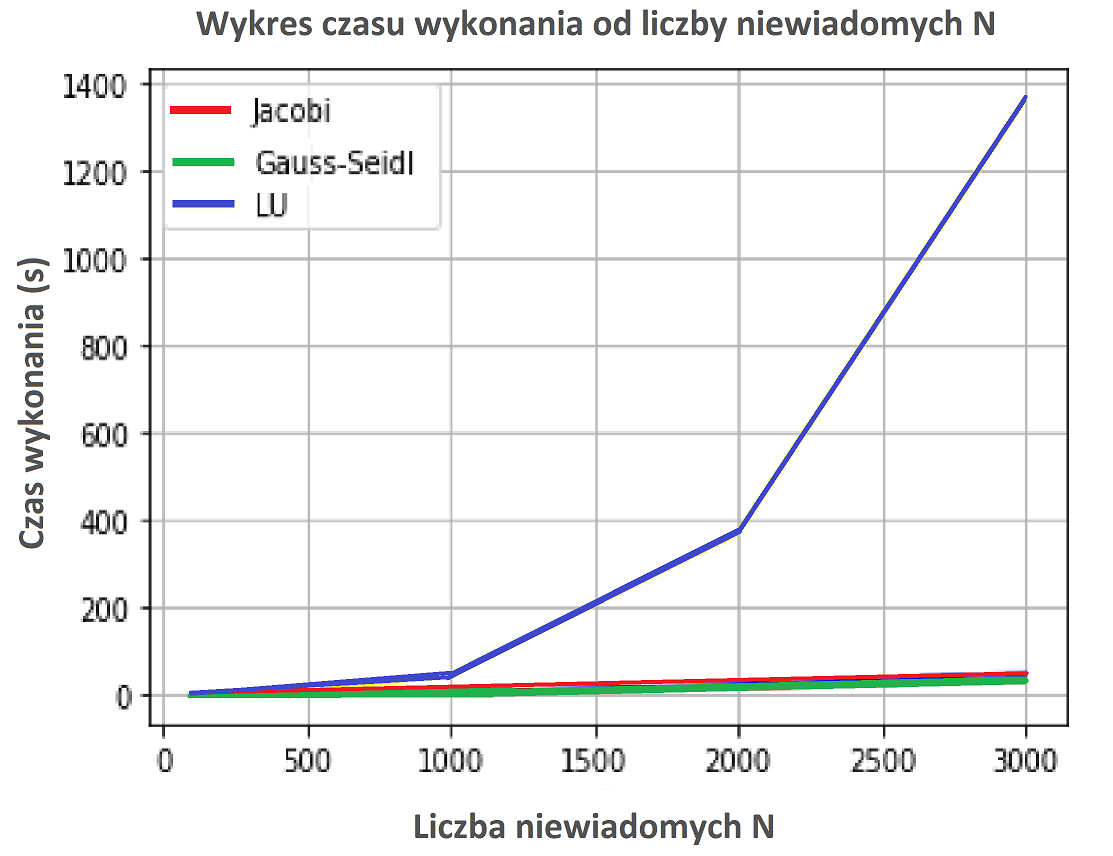

Wnioski po wykonaniu punktów A-E:
* Wykres dobrze przedstawia, że metody iteracyjne Gaussa-Seidela i Jacobiego są o wiele szybsze od metody faktoryzacji LU.
* Nie wszystkie równania można rozwiązać iteracyjnie (Zadanie C).
* Konieczne jest wtedy użycie metody faktoryzacji LU.